<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_MultiLinear_Regression_ToyotaCorolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2. Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]



Model -- model of the car
Price  -- Offer Price in EUROs
Age_08_04 -- Age in months as in August 2004
Mfg_Month -- Manufacturing month (1-12)
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [ ]:
tc=pd.read_csv("ToyotaCorolla.csv",encoding="unicode_escape")
tc

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
tc.shape

(1436, 38)

In [ ]:
tc.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [ ]:
tc.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [ ]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
tc1=tc[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
tc1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
tc2=tc1.rename({'Age_08_04':'Age','Quarterly_Tax':'QTax'},axis=1)
tc2

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
tc2[tc2.duplicated()].shape

(1, 9)

In [ ]:
tc2[tc2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
tc3=tc2.drop_duplicates()
tc3.shape

(1435, 9)

In [ ]:
tc3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [ ]:
tc3.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


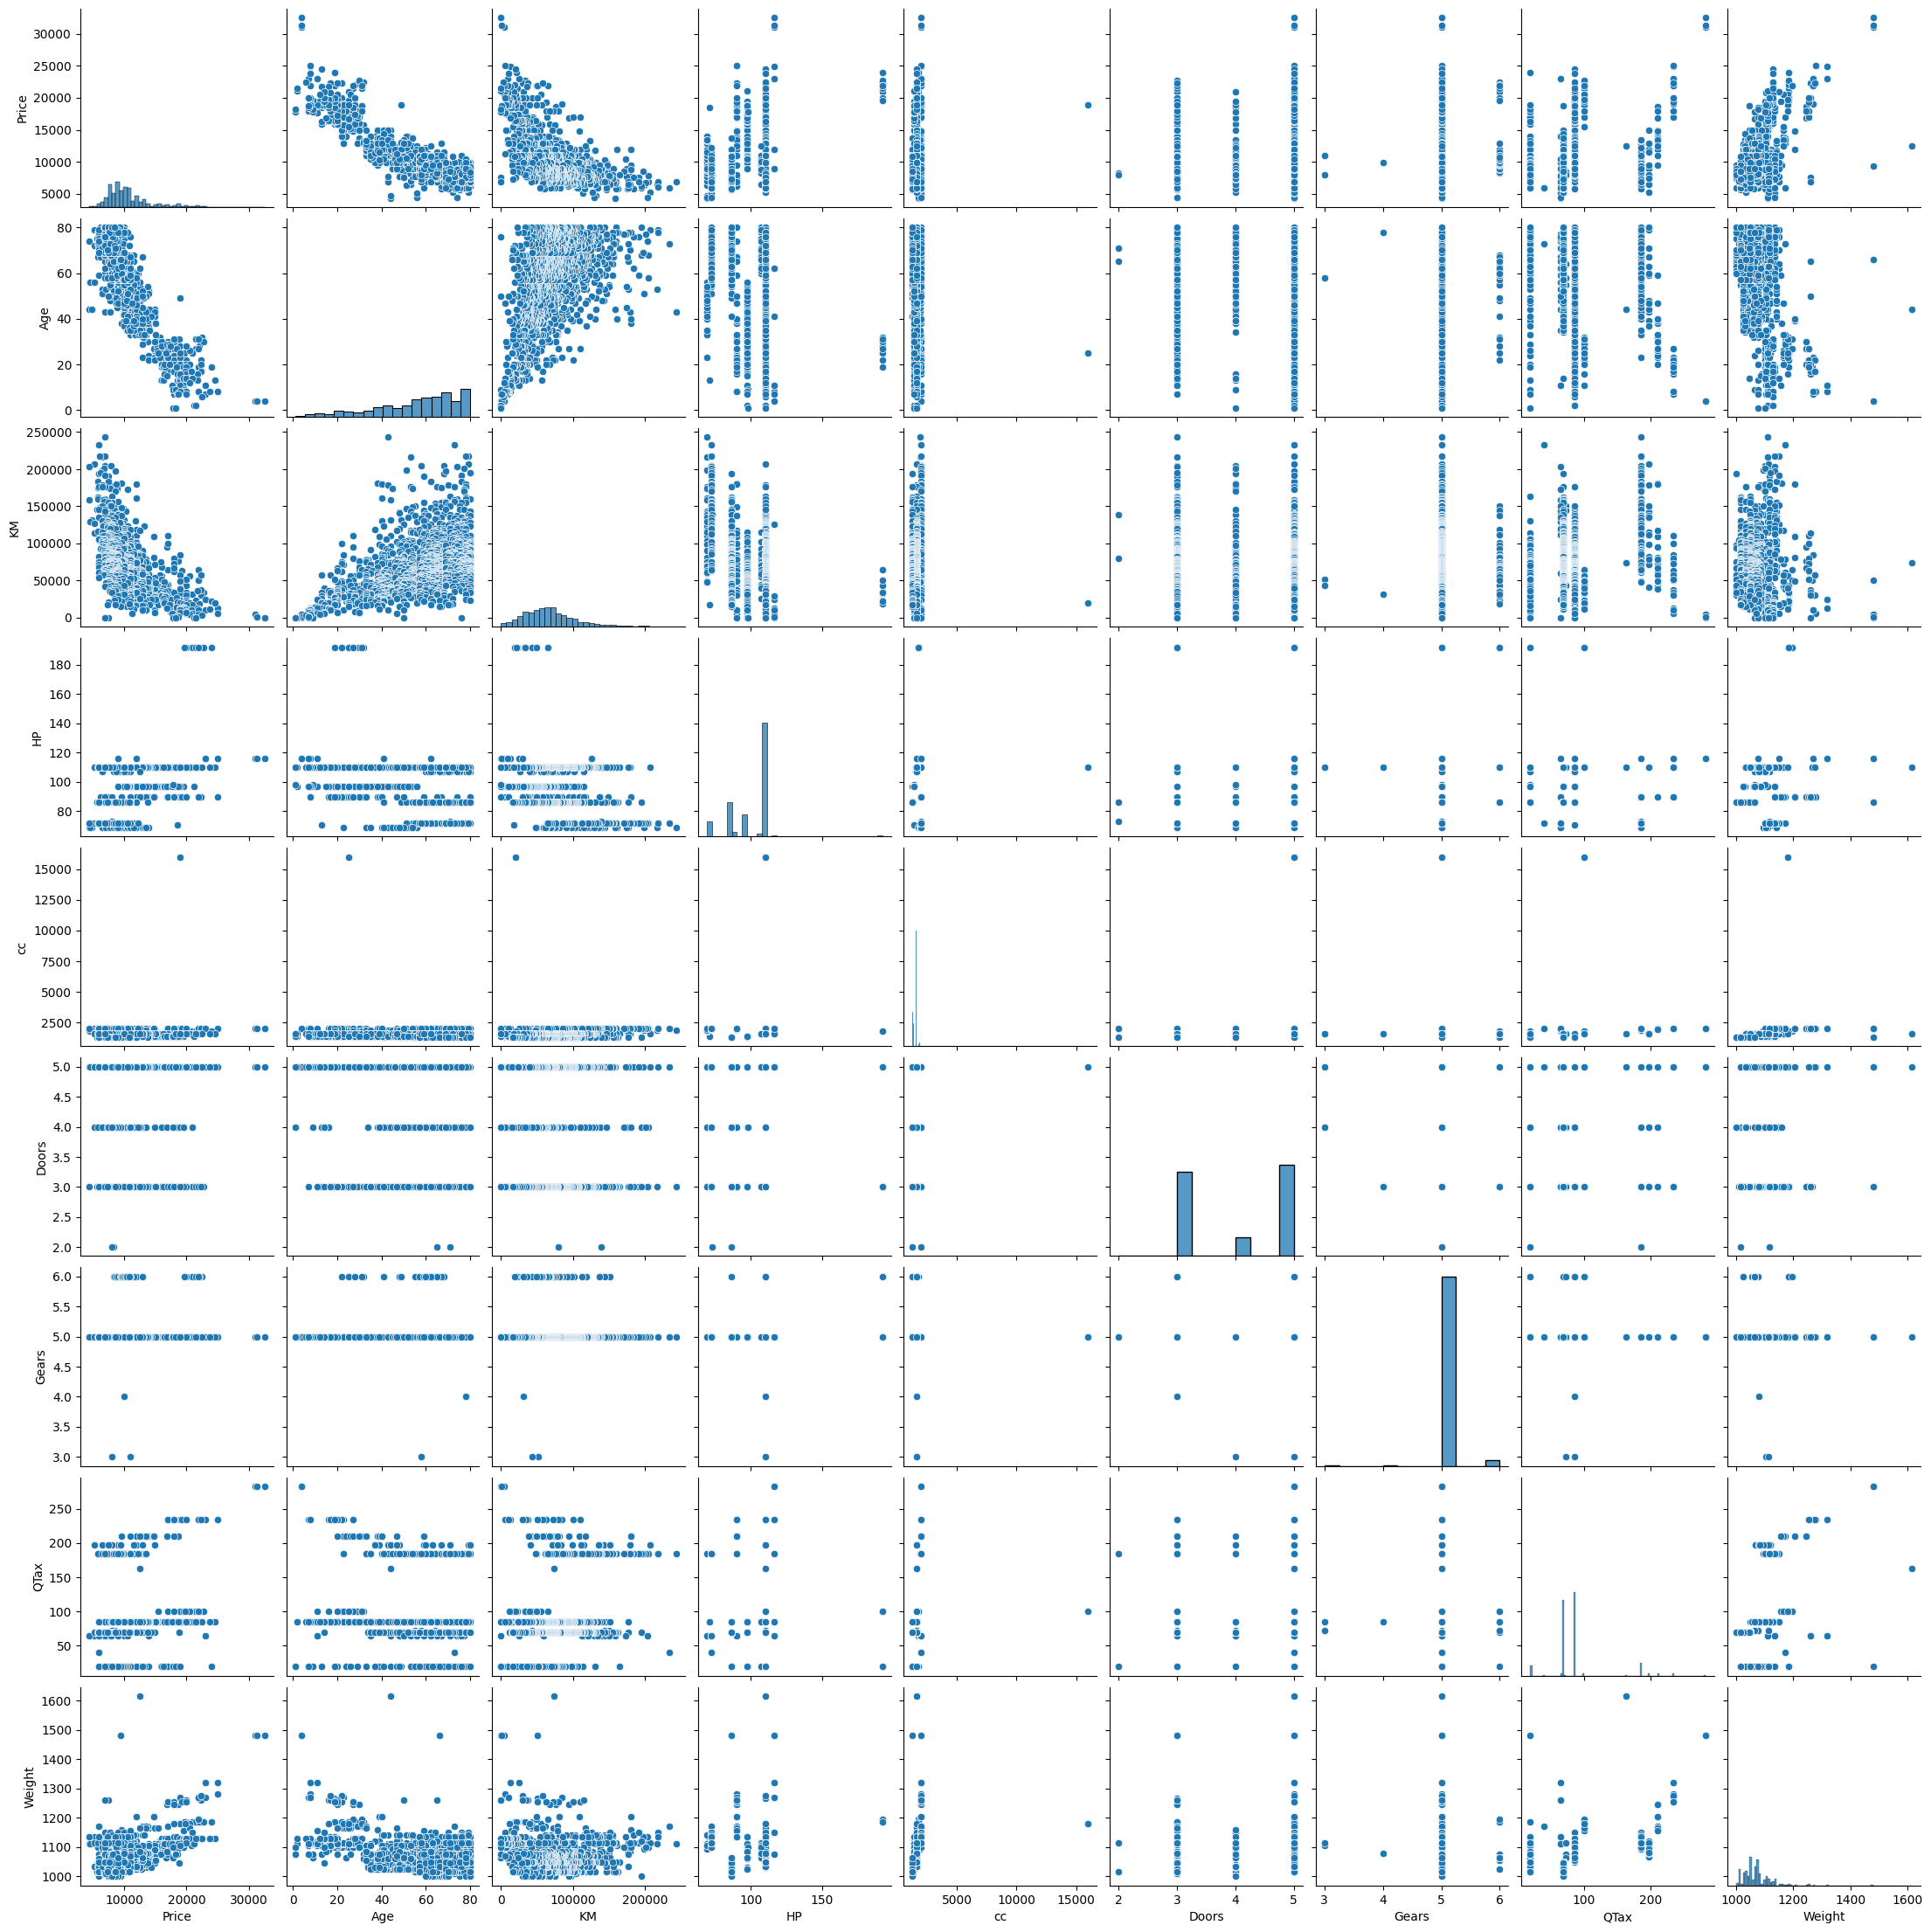

In [ ]:
sns.pairplot(tc3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7945761ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e79457623e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7945761c00>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7945762920>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7945762bc0>],
 'means': []}

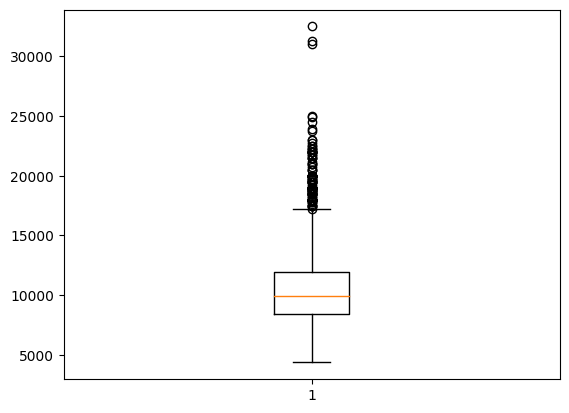

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.boxplot(tc3['Price'])

<Axes: xlabel='Price', ylabel='Density'>

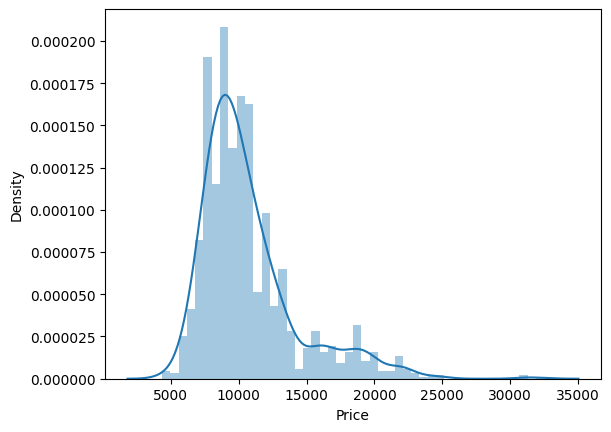

In [ ]:
sns.distplot(tc3['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7945a52800>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7945a52d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7945a52560>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7945a53280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7945a53520>],
 'means': []}

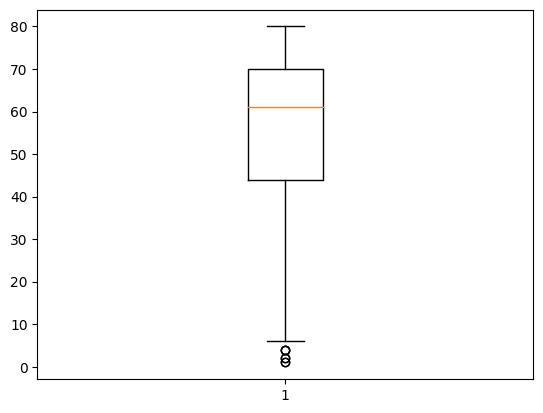

In [ ]:
plt.boxplot(tc3['Age'])

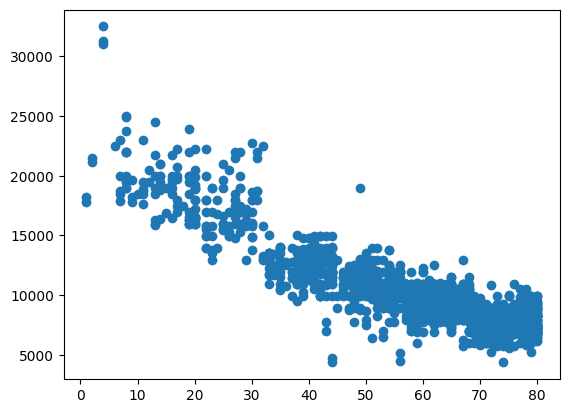

In [ ]:
plt.scatter(tc3['Age'],tc3['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7945955f30>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7945956470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7945955d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7e79459569b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7945956c50>],
 'means': []}

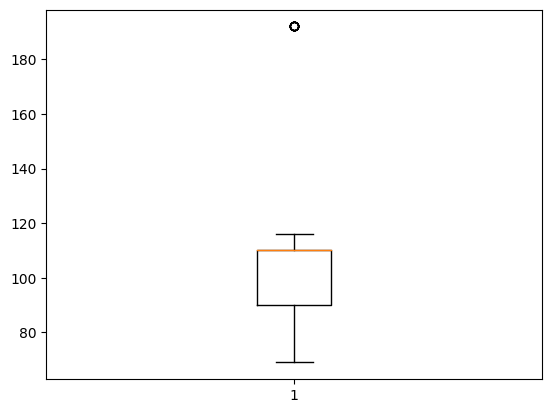

In [ ]:
plt.boxplot(tc3['HP'])

(array([109., 285., 166., 864.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <BarContainer object of 10 artists>)

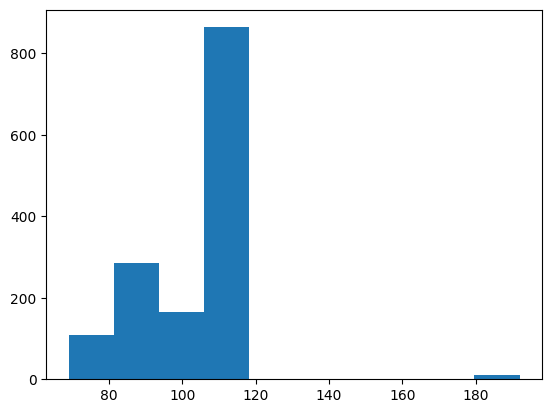

In [ ]:
plt.hist(tc3['HP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7942e8f4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7942e8fa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7942e8f220>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7942e8ff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7942ec4220>],
 'means': []}

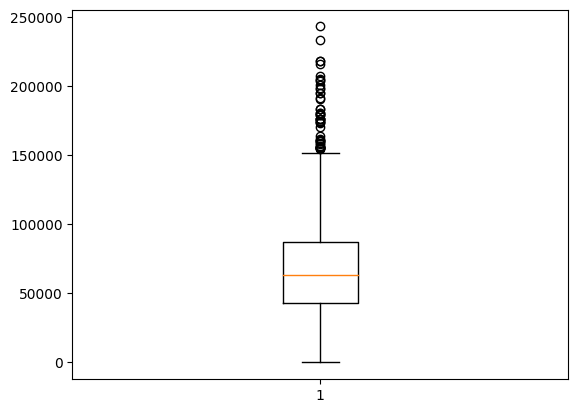

In [ ]:
plt.boxplot(tc3['KM'])

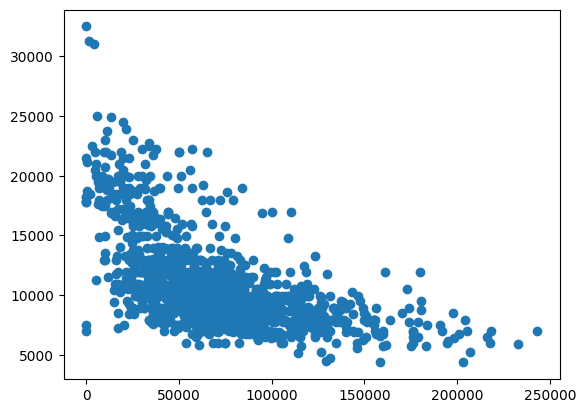

In [ ]:
plt.scatter(tc3['KM'],tc3['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7942d82d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7942d83130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7942d82a70>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7942d83670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7942d83910>],
 'means': []}

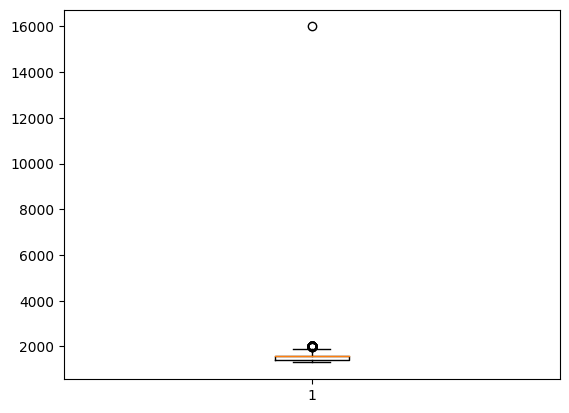

In [ ]:
plt.boxplot(tc3['cc'])

<Axes: xlabel='cc', ylabel='Count'>

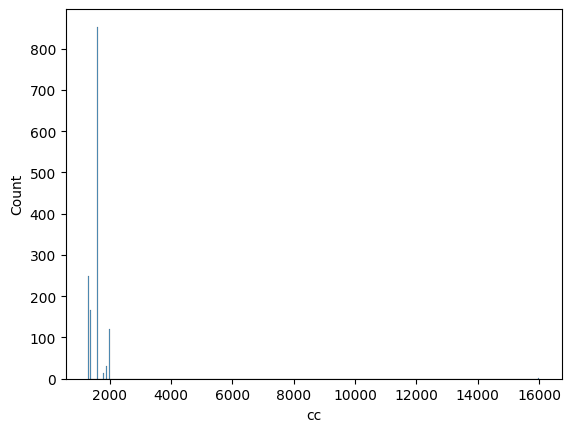

In [ ]:
sns.histplot(tc3['cc'])

<Axes: xlabel='Doors', ylabel='Count'>

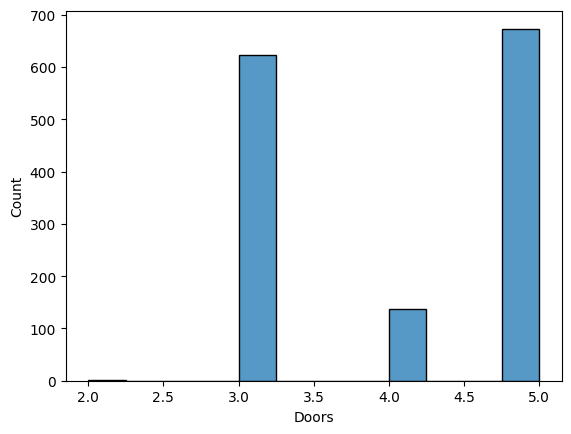

In [ ]:
sns.histplot(tc3['Doors'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7942860f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7e79428614b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7942860cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e79428619f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7942861c90>],
 'means': []}

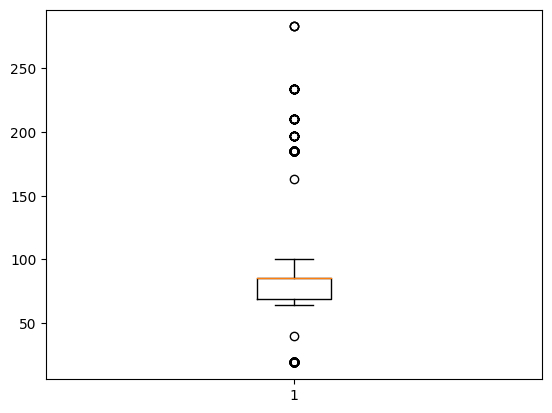

In [ ]:
plt.boxplot(tc3['QTax'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e79428baf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e79428bb490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e79428bacb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e79428bb9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e79428bbc70>],
 'means': []}

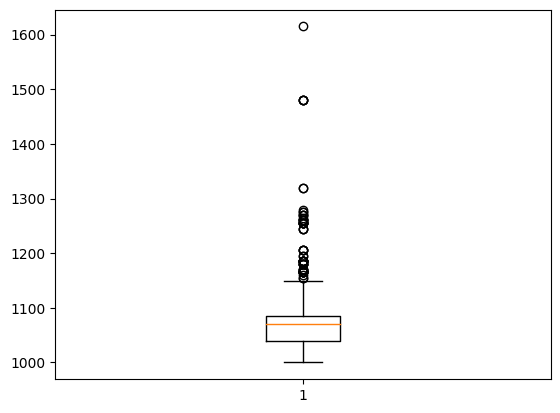

In [ ]:
plt.boxplot(tc3['Weight'])

In [ ]:
#Multi linear Regression model
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:29:27   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Weight         16.855470
dtype: float64

In [ ]:
#PValue for Doors and cc are >0.05 and so are insignificant
model.pvalues

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QTax          3.290363e-03
Weight        1.031118e-51
dtype: float64

In [ ]:
#Simple Linear Regression with Insignificant independent variables cc & Doors
model_cc=smf.ols('Price~cc',data=tc3).fit()
print(model_cc.tvalues,'\n',model_cc.pvalues)

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [ ]:
model_Doors=smf.ols('Price~Doors',data=tc3).fit()
print(model_Doors.tvalues,'\n',model_Doors.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [ ]:
#When seperated cc & Doors are significant with Pvalues <0.05
model_cc_Doors=smf.ols('Price~cc+Doors',data=tc3).fit()
print(model_cc_Doors.tvalues,'\n',model_cc_Doors.pvalues)

Intercept    12.786341
cc            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


Calculate VIF-Variable Inflation Factor

In [ ]:
rsq_Age=smf.ols("Age~KM+HP+cc+Doors+Gears+QTax+Weight",data=tc3).fit().rsquared
vif_Age=1/(1-rsq_Age)
vif_Age

1.8762358497682892

In [ ]:
rsq_KM=smf.ols("KM~HP+cc+Doors+Gears+QTax+Weight+Age",data=tc3).fit().rsquared
vif_KM=1/(1-rsq_KM)
vif_KM

1.75717802398104

In [ ]:
rsq_HP=smf.ols("HP~cc+Doors+Gears+QTax+Weight+Age+KM",data=tc3).fit().rsquared
vif_HP=1/(1-rsq_HP)
vif_HP

1.4191801087182137

In [ ]:
rsq_cc=smf.ols("cc~Doors+Gears+QTax+Weight+Age+KM+HP",data=tc3).fit().rsquared
vif_cc=1/(1-rsq_cc)
vif_cc

1.1634703645940845

In [ ]:
rsq_Doors=smf.ols("Doors~Gears+QTax+Weight+Age+KM+HP+cc",data=tc3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
vif_Doors

1.1558898658142076

In [ ]:
rsq_Gears=smf.ols("Gears~QTax+Weight+Age+KM+HP+cc+Doors",data=tc3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
vif_Gears

1.0988429081631148

In [ ]:
rsq_QTax=smf.ols("QTax~Weight+Age+KM+HP+cc+Doors+Gears",data=tc3).fit().rsquared
vif_QTax=1/(1-rsq_QTax)
vif_QTax

2.295374508985715

In [ ]:
rsq_Weight=smf.ols("Weight~Age+KM+HP+cc+Doors+Gears+QTax",data=tc3).fit().rsquared
vif_Weight=1/(1-rsq_Weight)
vif_Weight

2.4871800071791856

According to VIF Weight is an insignificant variable

In [ ]:
# Storing vif values in a data frame.Greater VIF can be removed, in the below case
vif={"Variables":["Age","KM","HP","cc","Doors","Gears","QTax","Weight"],
     "VIF":[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QTax,vif_Weight]}
vif_frame = pd.DataFrame(vif)
vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTax,2.295375
7,Weight,2.487180


There is no pattern between standardized fitted values(PV) and standardized residual values(errors)
model is good

Text(0, 0.5, 'Standardized residual values')

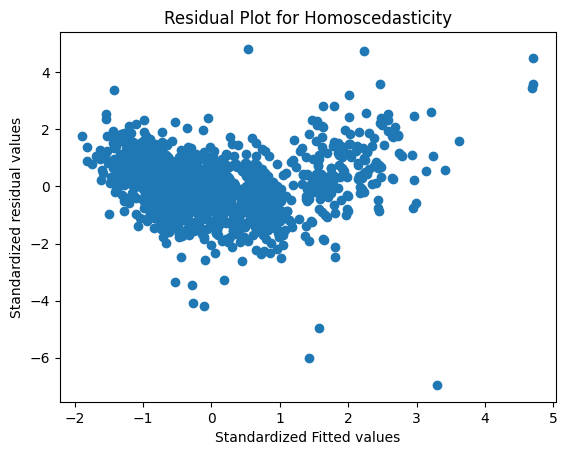

In [ ]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

Q-Q Plots-Not all residuals are lying on starignt line. There are outliers influencing Variables

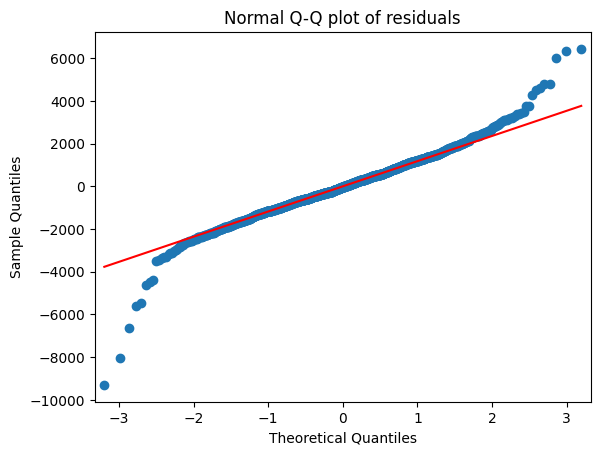

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959])]

In [ ]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057])]

In [ ]:
tc4=tc3.drop(tc3.index[[109,110,111,124,146,170,190,191,220,392,401,522,600,653,959,1057]],axis=0).reset_index()
tc4

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1414,1431,7500,69,20544,86,1300,3,5,69,1025
1415,1432,10845,72,19000,86,1300,3,5,69,1015
1416,1433,8500,71,17016,86,1300,3,5,69,1015
1417,1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
tc4= tc4.drop(['index'],axis=1)

In [ ]:
tc4.shape

(1419, 9)

Regressors vs Residual

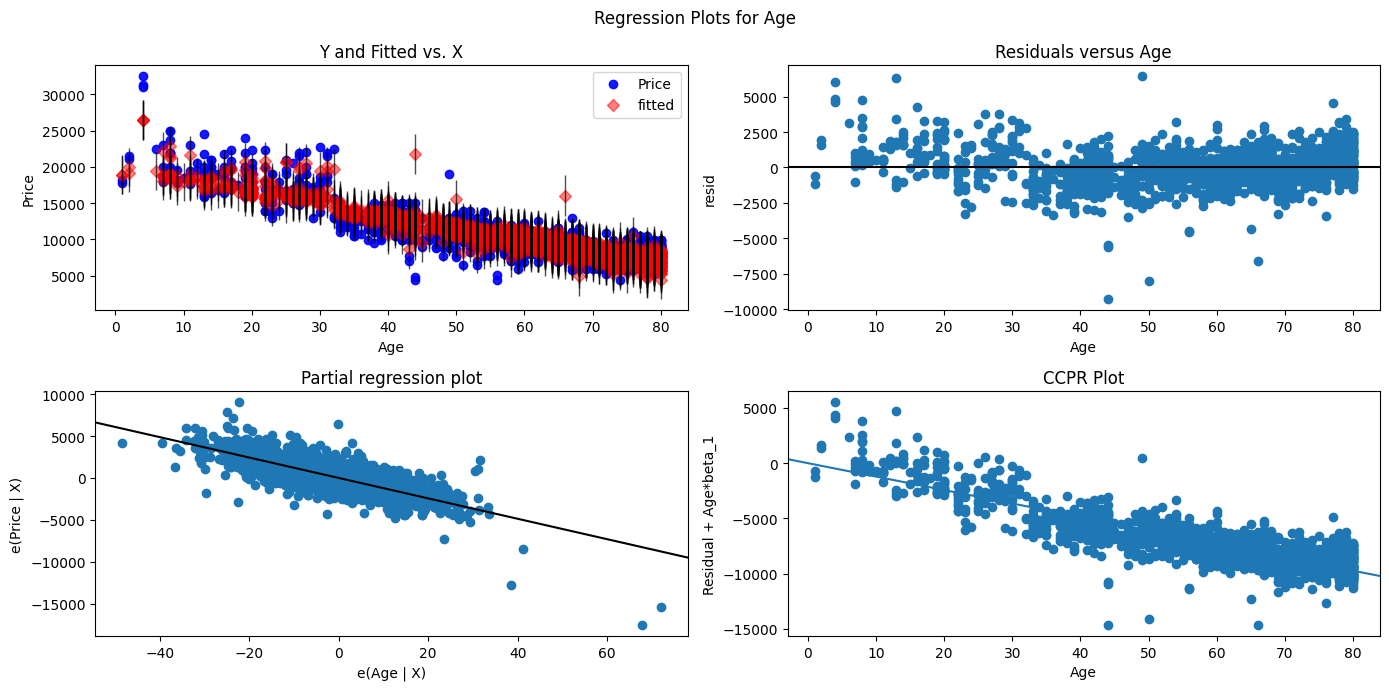

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)

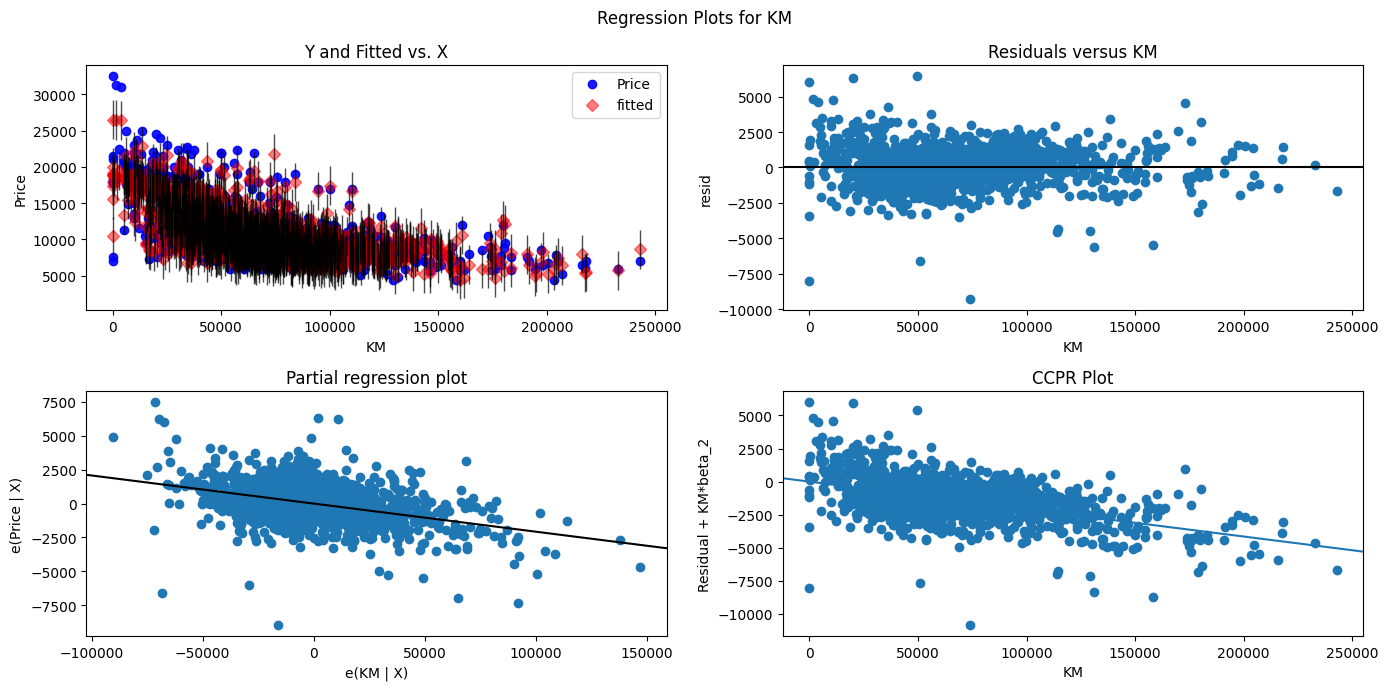

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)

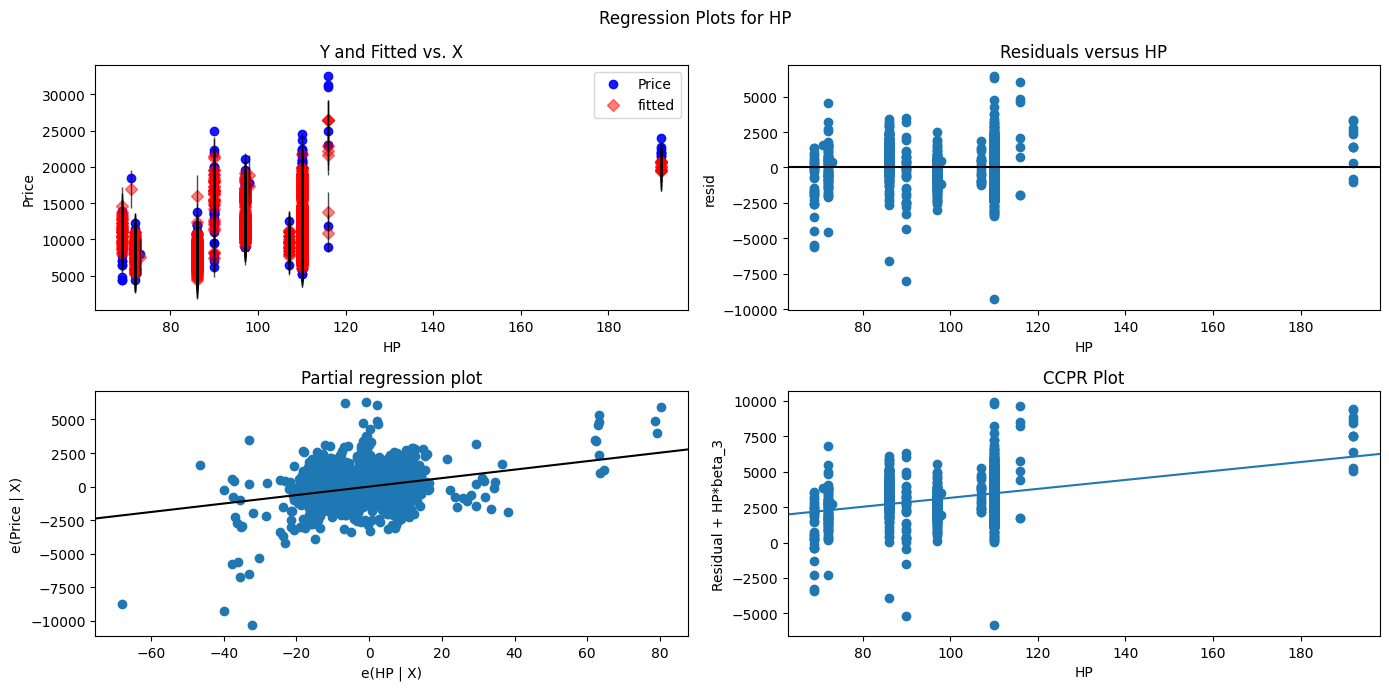

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)

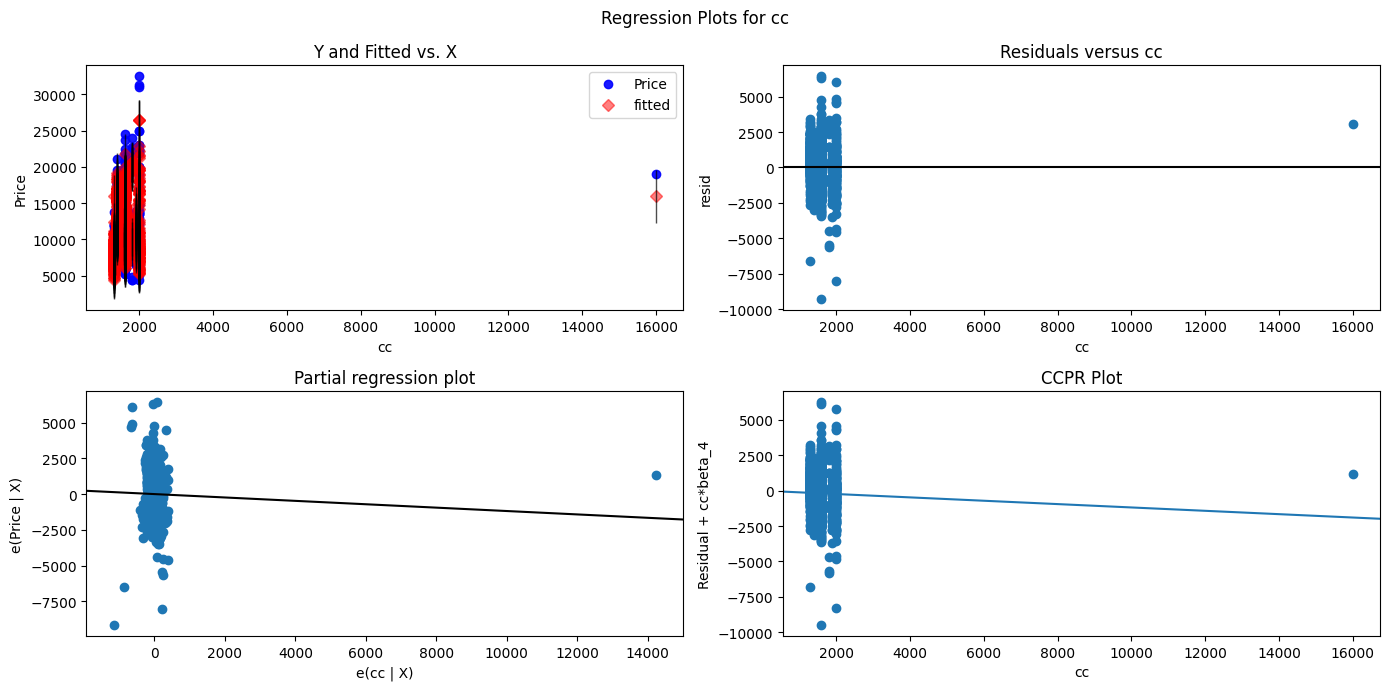

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)

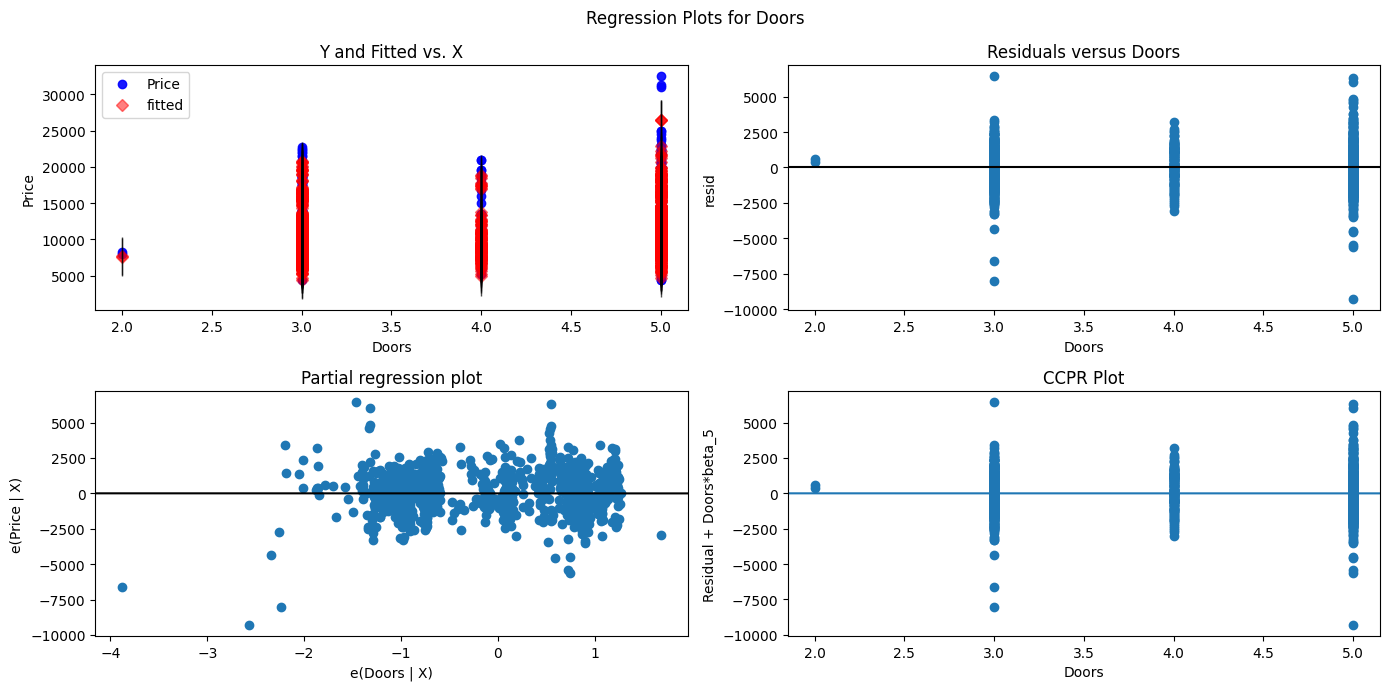

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)

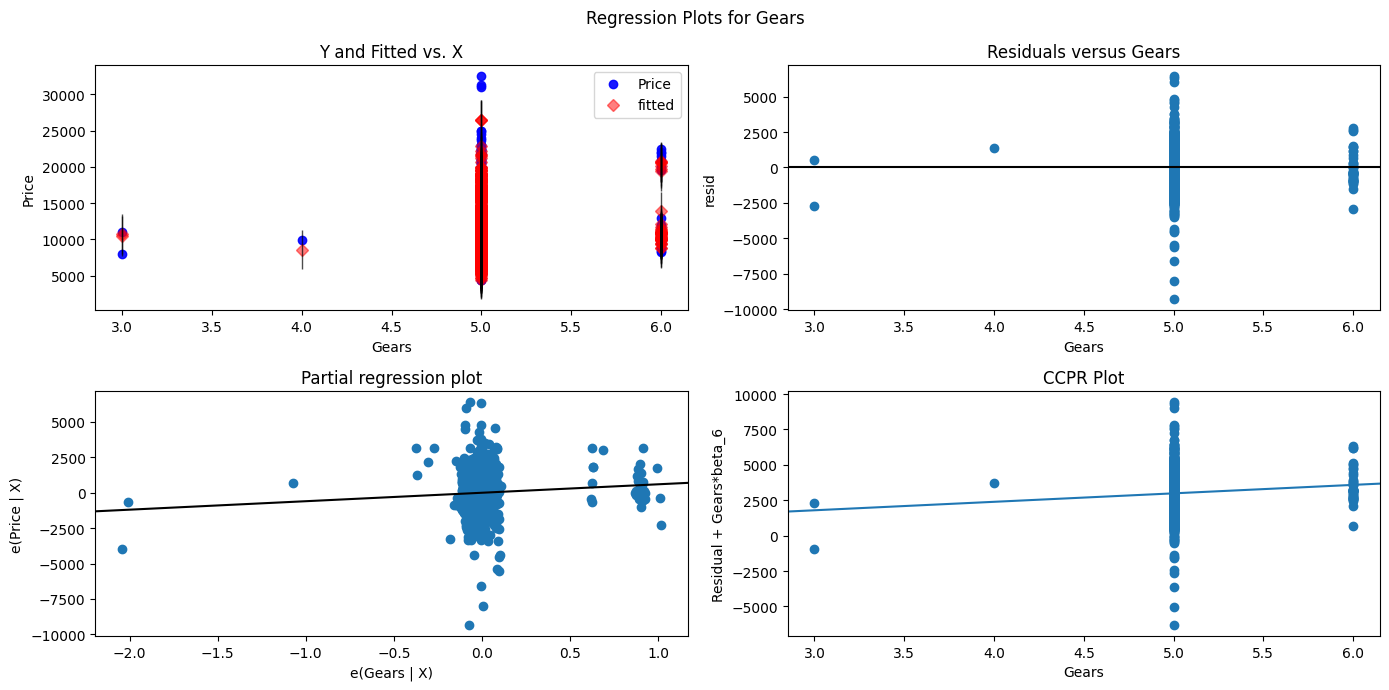

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)

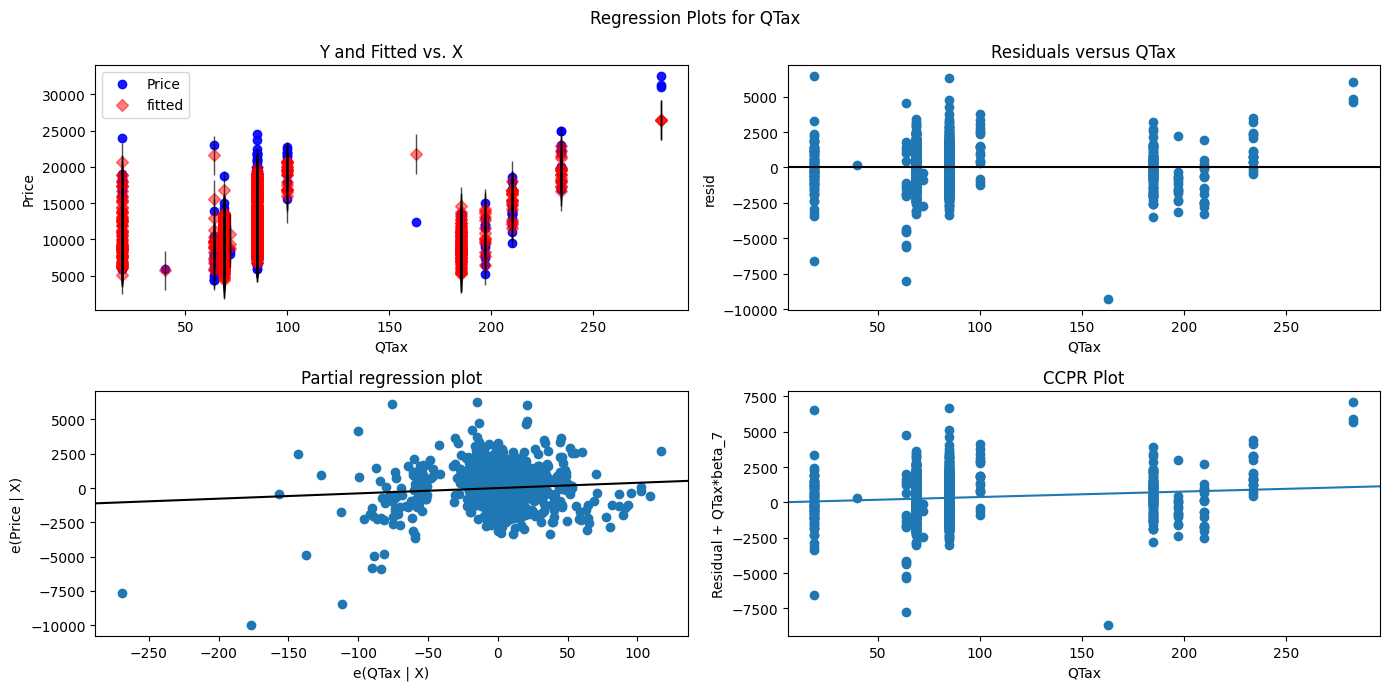

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "QTax", fig=fig)

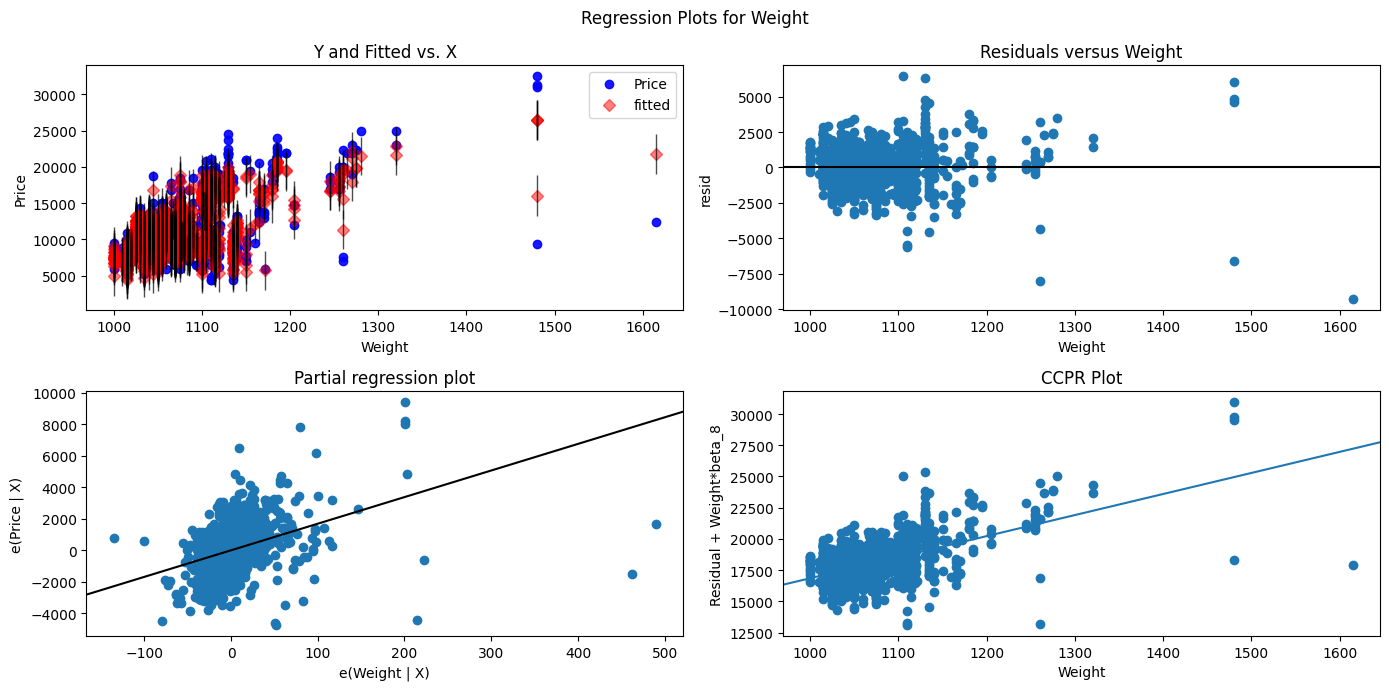

In [ ]:
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)

Detecting Outliers

In [ ]:
#Model Improved by 0.02
model2=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:48:15   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
Age         -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM            -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP            20.8295      2.586      8.054      0.000      15.756      25.903
cc            -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors        -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears        649.4229    172.976      3.754      0.000     310.105     988.741
QTax          -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight        25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Identify outliers with Cooks Distance

In [ ]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

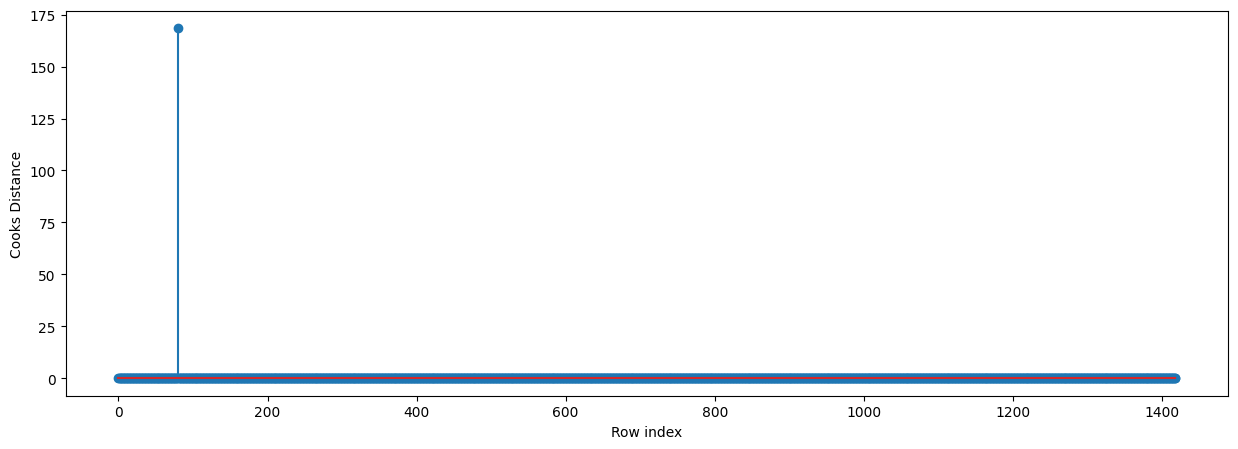

In [ ]:
fig = plt.subplots(figsize=(15, 5))
plt.stem(np.arange(len(tc4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(80, 168.4854878268442)

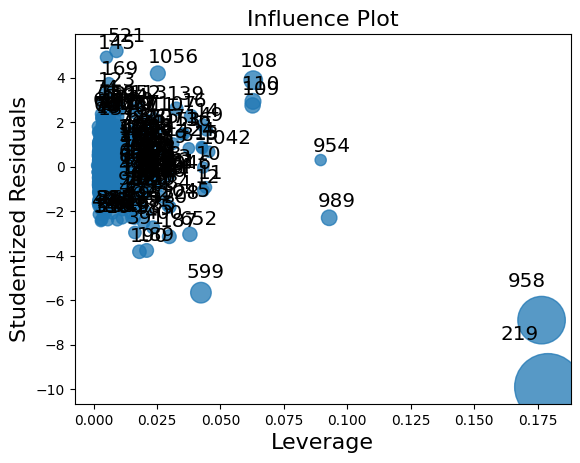

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [ ]:
k = 8
n = 1419
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.019027484143763214

In [ ]:
# argmax shows one observation 80
tc4[tc4.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
#Discard outliers
tc5=tc4.drop(tc4.index[[80]],axis=0).reset_index()
tc5

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1413,1414,7500,69,20544,86,1300,3,5,69,1025
1414,1415,10845,72,19000,86,1300,3,5,69,1015
1415,1416,8500,71,17016,86,1300,3,5,69,1015
1416,1417,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
tc5=tc5.drop(["index"],axis=1)
tc5

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1413,7500,69,20544,86,1300,3,5,69,1025
1414,10845,72,19000,86,1300,3,5,69,1015
1415,8500,71,17016,86,1300,3,5,69,1015
1416,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#There is a slight improvement in Rsquared &Adj RSquared value by removing 1 outlier
model2=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc5).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1445.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:57:02   Log-Likelihood:                -11977.
No. Observations:                1418   AIC:                         2.397e+04
Df Residuals:                    1409   BIC:                         2.402e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.622e+04   1435.062    -11.300      0.000    -1.9e+04   -1.34e+04
Age         -110.6898      2.354    -47.019      0.000    -115.308    -106.072
KM            -0.0169      0.001    -15.231      0.000      -0.019      -0.015
HP            29.9245      2.619     11.428      0.000      24.788      35.061
cc            -3.2624      0.294    -11.115      0.000      -3.838      -2.687
Doors       -134.9626     35.177     -3.837      0.000    -203.968     -65.957
Gears        531.3663    166.454      3.192      0.001     204.842     857.891
QTax           1.3796      1.347      1.024      0.306      -1.262       4.021
Weight        31.8442      1.366     23.320      0.000      29.166      34.523
==============================================================================
Omnibus:                        8.891   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.119
Skew:                           0.119   Prob(JB):                      0.00635
Kurtosis:                       3.338   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2_influence = model2.get_influence()
(c2, _) = model2_influence.cooks_distance

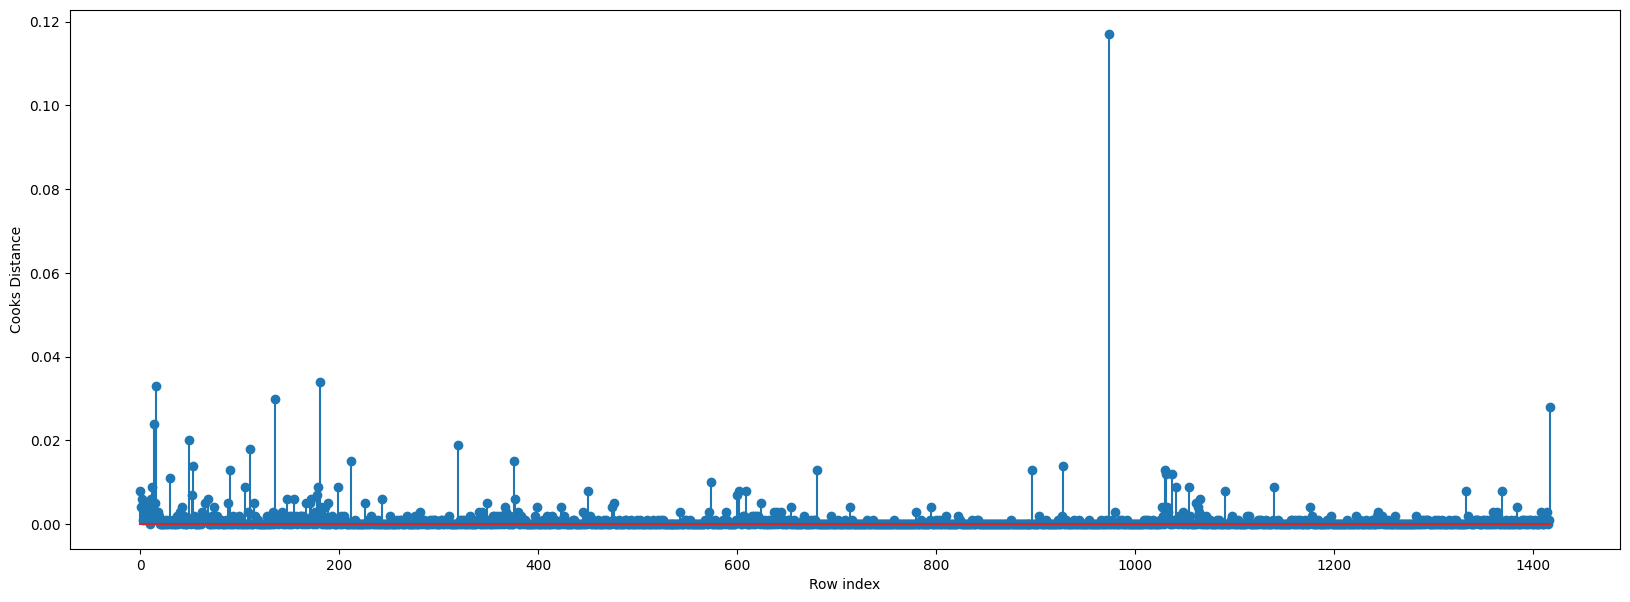

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc5)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c2),np.max(c2))

(974, 0.11665661388520678)

In [ ]:
tc6= tc5.drop(tc5.index[[974]],axis=0).reset_index()
tc6= tc6.drop(['index'],axis=1)
tc6

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1412,7500,69,20544,86,1300,3,5,69,1025
1413,10845,72,19000,86,1300,3,5,69,1015
1414,8500,71,17016,86,1300,3,5,69,1015
1415,7250,70,16916,86,1300,3,5,69,1015


Model 3 has improved Rsauared & Adj Rsquared value and is higher when compared to other models.
Model 3 is the best model

In [ ]:
model3=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc6).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1455.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:02:39   Log-Likelihood:                -11964.
No. Observations:                1417   AIC:                         2.395e+04
Df Residuals:                    1408   BIC:                         2.399e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.569e+04   1440.268    -10.892      0.000   -1.85e+04   -1.29e+04
Age         -110.3879      2.349    -47.001      0.000    -114.995    -105.781
KM            -0.0169      0.001    -15.269      0.000      -0.019      -0.015
HP            30.4886      2.616     11.653      0.000      25.356      35.621
cc            -3.2922      0.293    -11.246      0.000      -3.866      -2.718
Doors       -144.2598     35.189     -4.100      0.000    -213.288     -75.231
Gears        364.8142    174.098      2.095      0.036      23.295     706.333
QTax           1.3355      1.343      0.995      0.320      -1.298       3.969
Weight        32.1468      1.365     23.559      0.000      29.470      34.824
==============================================================================
Omnibus:                        9.350   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.478
Skew:                           0.131   Prob(JB):                      0.00531
Kurtosis:                       3.330   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred = model3.predict(tc6.iloc[:,1:])
pred

0       16261.072271
1       15821.622564
2       16240.010268
3       15912.737575
4       15792.791203
            ...     
1412     9124.687591
1413     8498.201593
1414     8642.186235
1415     8754.267550
1416    10949.691989
Length: 1417, dtype: float64